In [0]:
import pandas as pd
import numpy as np
import missingno as msno
%matplotlib inline

In [0]:
#https://www.kaggle.com/imdevskp/ebola-outbreak-20142016-complete-dataset/data
path = 'ebola_2014_2016_clean.csv'
df = pd.read_csv(path, encoding='latin', error_bad_lines=False)
df.head()

,Country,Date,No. of suspected cases,No. of probable cases,No. of confirmed cases,"No. of confirmed, probable and suspected cases",No. of suspected deaths,No. of probable deaths,No. of confirmed deaths,"No. of confirmed, probable and suspected deaths"
0,Guinea,29/08/14,25.0,141.0,482.0,648.0,2.0,141.0,287.0,430
1,Nigeria,29/08/14,3.0,1.0,15.0,19.0,0.0,1.0,6.0,7
2,Sierra Leone,29/08/14,54.0,37.0,935.0,1026.0,8.0,34.0,380.0,422
3,Liberia,29/08/14,382.0,674.0,322.0,1378.0,168.0,301.0,225.0,694
4,Sierra Leone,05/09/14,78.0,37.0,1146.0,1261.0,11.0,37.0,443.0,491


In [0]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2485 entries, 0 to 2484
Data columns (total 10 columns):
Country                                            2485 non-null object
Date                                               2485 non-null object
No. of suspected cases                             2366 non-null float64
No. of probable cases                              2436 non-null float64
No. of confirmed cases                             2484 non-null float64
No. of confirmed, probable and suspected cases     2477 non-null float64
No. of suspected deaths                            1308 non-null float64
No. of probable deaths                             1526 non-null float64
No. of confirmed deaths                            1648 non-null float64
No. of confirmed, probable and suspected deaths    2485 non-null int64
dtypes: float64(7), int64(1), object(2)
memory usage: 194.3+ KB


In [0]:
df.shape

(2485, 10)

In [0]:
df.shape[0]


2485

In [0]:
df.shape[1]


10

In [0]:
df.columns.values.tolist()

['Country',
 'Date',
 'No. of suspected cases',
 'No. of probable cases',
 'No. of confirmed cases',
 'No. of confirmed, probable and suspected cases',
 'No. of suspected deaths',
 'No. of probable deaths',
 'No. of confirmed deaths',
 'No. of confirmed, probable and suspected deaths']

In [0]:
df.dtypes

Country                                             object
Date                                                object
No. of suspected cases                             float64
No. of probable cases                              float64
No. of confirmed cases                             float64
No. of confirmed, probable and suspected cases     float64
No. of suspected deaths                            float64
No. of probable deaths                             float64
No. of confirmed deaths                            float64
No. of confirmed, probable and suspected deaths      int64
dtype: object

In [0]:

df.isnull().any().any()

True

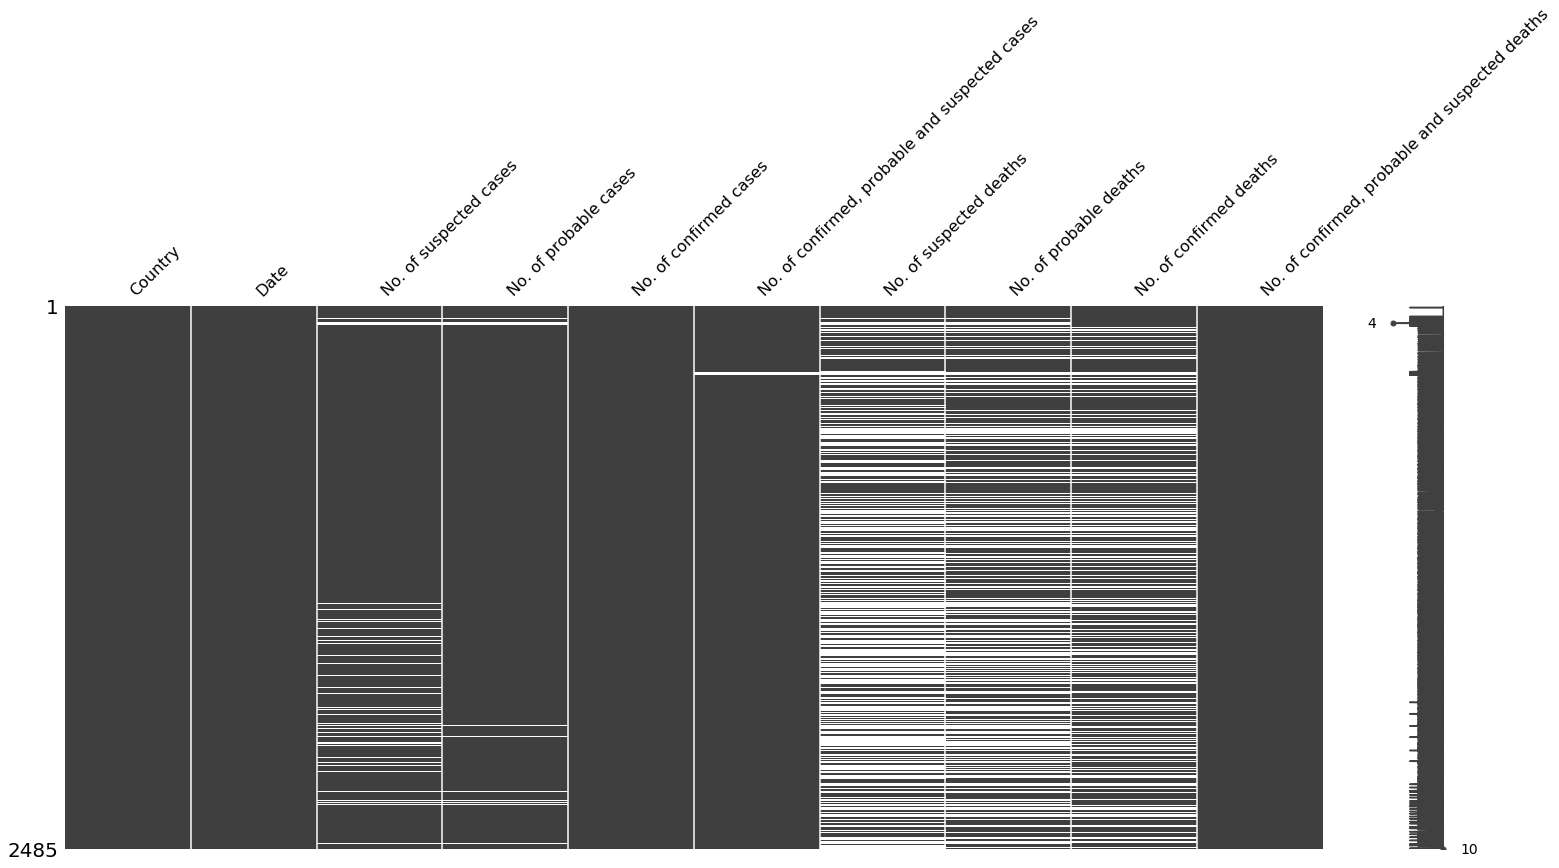

In [0]:

msno.matrix(df)

In [0]:
df.replace({' ': np.nan}, inplace=True)


In [0]:
df.isnull().any().any()

True

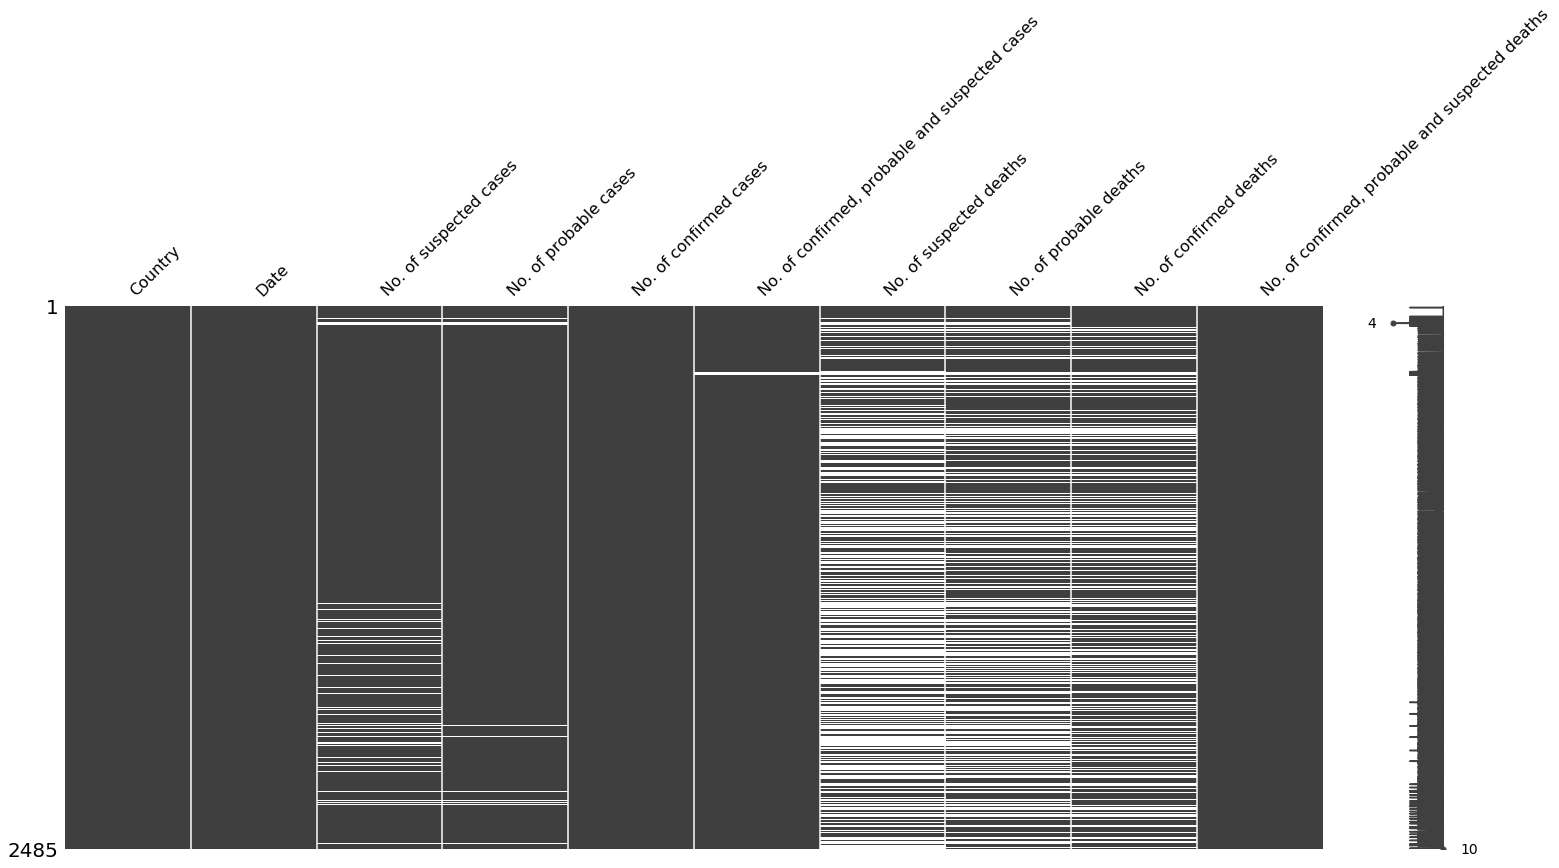

In [0]:
msno.matrix(df)

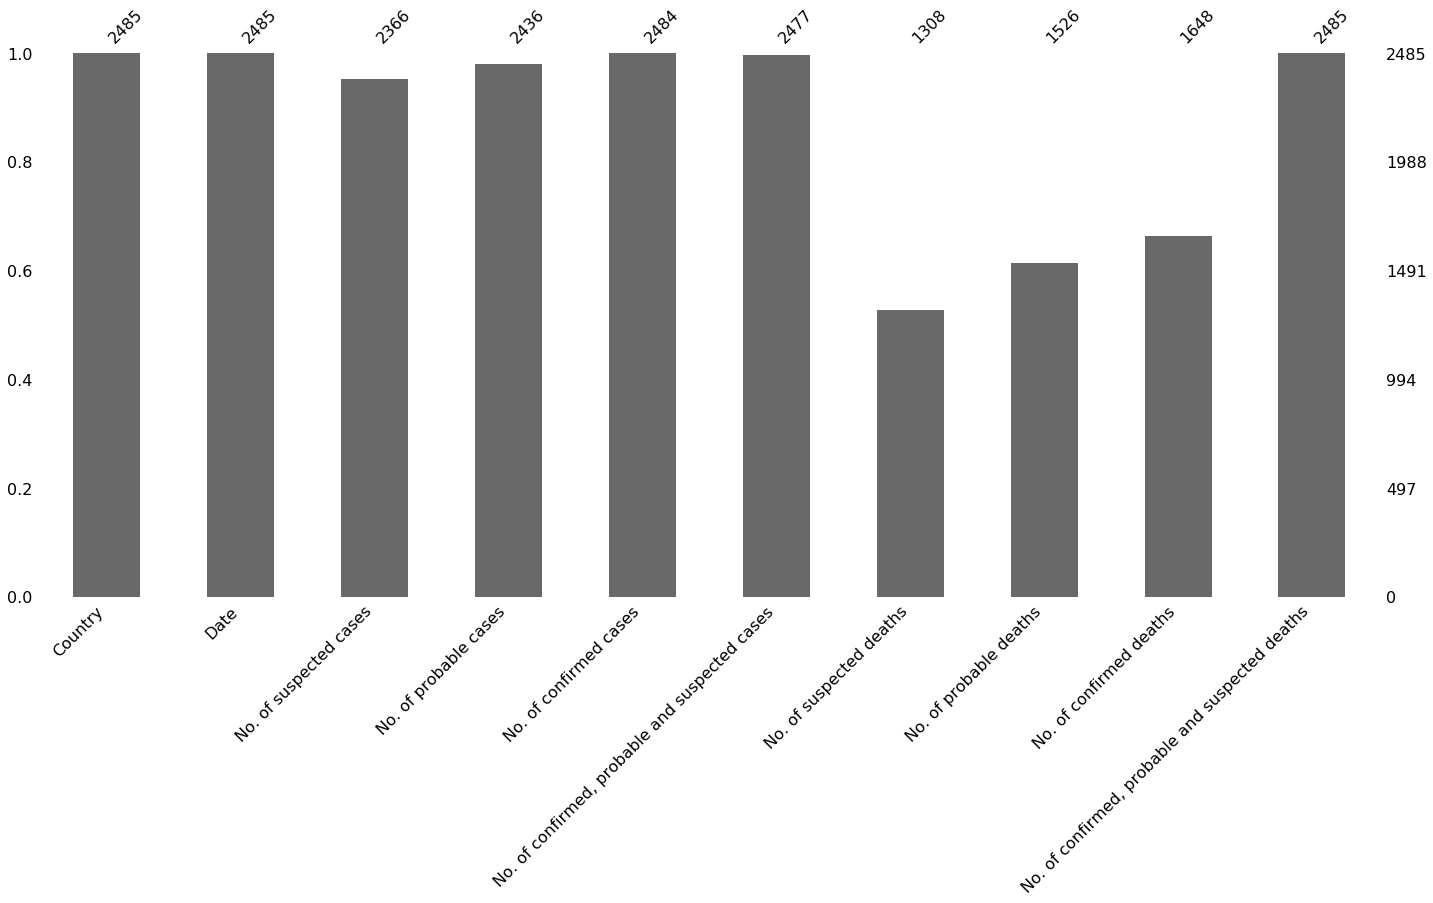

In [0]:

msno.bar(df)

In [0]:
df.columns[df.isnull().any()].tolist()

['No. of suspected cases',
 'No. of probable cases',
 'No. of confirmed cases',
 'No. of confirmed, probable and suspected cases',
 'No. of suspected deaths',
 'No. of probable deaths',
 'No. of confirmed deaths']

In [0]:
df.describe()

,No. of suspected cases,No. of probable cases,No. of confirmed cases,"No. of confirmed, probable and suspected cases",No. of suspected deaths,No. of probable deaths,No. of confirmed deaths,"No. of confirmed, probable and suspected deaths"
count,2366.000000,2436.000000,2484.000000,2477.000000,1308.000000,1526.000000,1648.000000,2485.000000
mean,891.841505,263.733580,1436.616345,2553.678644,32.899083,104.535387,781.662015,1028.347686
std,1828.699240,561.483886,2574.200797,4427.118148,73.166362,161.420208,1258.113098,1656.064372
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,7.000000,8.000000,0.000000,1.000000,2.000000,6.000000
75%,17.000000,287.000000,3118.000000,3657.000000,0.000000,208.000000,1760.750000,2386.000000
max,5636.000000,2106.000000,8704.000000,14122.000000,661.000000,803.000000,3858.000000,4806.000000


In [0]:
df.loc[[0]]

,Country,Date,No. of suspected cases,No. of probable cases,No. of confirmed cases,"No. of confirmed, probable and suspected cases",No. of suspected deaths,No. of probable deaths,No. of confirmed deaths,"No. of confirmed, probable and suspected deaths"
0,Guinea,29/08/14,25.0,141.0,482.0,648.0,2.0,141.0,287.0,430


In [0]:
df.loc[30:33]

,Country,Date,No. of suspected cases,No. of probable cases,No. of confirmed cases,"No. of confirmed, probable and suspected cases",No. of suspected deaths,No. of probable deaths,No. of confirmed deaths,"No. of confirmed, probable and suspected deaths"
30,Sierra Leone,22/09/14,136.0,37.0,1640.0,1813.0,11.0,37.0,545.0,593
31,Liberia,22/09/14,817.0,1342.0,863.0,3022.0,364.0,544.0,670.0,1578
32,Senegal,22/09/14,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0
33,Guinea,22/09/14,28.0,162.0,818.0,1008.0,5.0,162.0,465.0,632


In [0]:

df.drop([0,24,51], axis=0).head()

,Country,Date,No. of suspected cases,No. of probable cases,No. of confirmed cases,"No. of confirmed, probable and suspected cases",No. of suspected deaths,No. of probable deaths,No. of confirmed deaths,"No. of confirmed, probable and suspected deaths"
1,Nigeria,29/08/14,3.0,1.0,15.0,19.0,0.0,1.0,6.0,7
2,Sierra Leone,29/08/14,54.0,37.0,935.0,1026.0,8.0,34.0,380.0,422
3,Liberia,29/08/14,382.0,674.0,322.0,1378.0,168.0,301.0,225.0,694
4,Sierra Leone,05/09/14,78.0,37.0,1146.0,1261.0,11.0,37.0,443.0,491
5,Nigeria,05/09/14,3.0,1.0,18.0,22.0,0.0,1.0,7.0,8


In [0]:
df.drop(df.index[1:5], axis=0).head(10)

,Country,Date,No. of suspected cases,No. of probable cases,No. of confirmed cases,"No. of confirmed, probable and suspected cases",No. of suspected deaths,No. of probable deaths,No. of confirmed deaths,"No. of confirmed, probable and suspected deaths"
0,Guinea,29/08/14,25.0,141.0,482.0,648.0,2.0,141.0,287.0,430
5,Nigeria,05/09/14,3.0,1.0,18.0,22.0,0.0,1.0,7.0,8
6,Liberia,05/09/14,369.0,888.0,614.0,1871.0,257.0,401.0,431.0,1089
7,Guinea,05/09/14,56.0,152.0,604.0,812.0,3.0,152.0,362.0,517
8,Senegal,05/09/14,NaN,NaN,1.0,1.0,NaN,NaN,0.0,0
9,Senegal,08/09/14,2.0,0.0,1.0,3.0,0.0,0.0,0.0,0
10,Guinea,08/09/14,47.0,151.0,664.0,862.0,4.0,151.0,400.0,555
11,Sierra Leone,08/09/14,90.0,37.0,1234.0,1361.0,11.0,37.0,461.0,509
12,Liberia,08/09/14,443.0,969.0,634.0,2046.0,296.0,420.0,508.0,1224
13,Nigeria,08/09/14,1.0,1.0,19.0,21.0,0.0,1.0,7.0,8


In [0]:
df[100:].head() #df.tail(-100) )

,Country,Date,No. of suspected cases,No. of probable cases,No. of confirmed cases,"No. of confirmed, probable and suspected cases",No. of suspected deaths,No. of probable deaths,No. of confirmed deaths,"No. of confirmed, probable and suspected deaths"
100,Senegal,29/10/14,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0
101,Spain,29/10/14,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0
102,Guinea,29/10/14,316.0,199.0,1391.0,1906.0,NaN,NaN,NaN,997
103,United States of America,29/10/14,0.0,0.0,4.0,4.0,0.0,0.0,1.0,1
104,Sierra Leone,29/10/14,1213.0,322.0,3700.0,5235.0,NaN,NaN,NaN,1500


In [0]:
df.Country.values

array(['Guinea', 'Nigeria', 'Sierra Leone', ..., 'Liberia', 'Nigeria',
       'United States of America'], dtype=object)

In [0]:
df.Country.unique()

array(['Guinea', 'Nigeria', 'Sierra Leone', 'Liberia', 'Senegal',
       'United States of America', 'Spain', 'Mali', 'United Kingdom',
       'Italy'], dtype=object)

In [0]:
df.Country.value_counts()

Liberia                     365
Sierra Leone                259
Guinea                      259
Nigeria                     255
Senegal                     254
United States of America    245
Spain                       243
Mali                        243
United Kingdom              221
Italy                       141
Name: Country, dtype: int64

In [0]:

df.agg(['count', 'size', 'nunique'])

,Country,Date,No. of suspected cases,No. of probable cases,No. of confirmed cases,"No. of confirmed, probable and suspected cases",No. of suspected deaths,No. of probable deaths,No. of confirmed deaths,"No. of confirmed, probable and suspected deaths"
count,2485,2485,2366,2436,2484,2477,1308,1526,1648,2485
size,2485,2485,2485,2485,2485,2485,2485,2485,2485,2485
nunique,10,259,311,103,343,435,29,75,284,341


In [0]:
df.groupby('Country').agg(['count', 'size', 'nunique']).stack()

Date  ...  No. of confirmed, probable and suspected deaths
Country                                 ...                                                 
Guinea                   count     259  ...                                              259
                         size      259  ...                                              259
                         nunique   259  ...                                              152
Italy                    count     141  ...                                              141
                         size      141  ...                                              141
                         nunique   141  ...                                                1
Liberia                  count     365  ...                                              365
                         size      365  ...                                              365
                         nunique   259  ...                                               71
Mali                     count     243  ...                                              243
                         size      243  ...                                              243
                         nunique   243  ...                                                5
Nigeria                  count     255  ...                                              255
                         size      255  ...                                              255
                         nunique   255  ...                                                2
Senegal                  count     254  ...                                              254
                         size      254  ...                                              254
                         nunique   254  ...                                                1
Sierra Leone             count     259  ...                                              259
                         size      259  ...                                              259
                         nunique   259  ...                                              117
Spain                    count     243  ...                                              243
                         size      243  ...                                              243
                         nunique   243  ...                                                1
United Kingdom           count     221  ...                                              221
                         size      221  ...                                              221
                         nunique   221  ...                                                1
United States of America count     245  ...                                              245
                         size      245  ...                                              245
                         nunique   245  ...                                                2

[30 rows x 9 columns]

In [0]:
df.groupby('Country').agg(['count', 'size', 'nunique'])

Date       ... No. of confirmed, probable and suspected deaths        
                         count size  ...                                            size nunique
Country                              ...                                                        
Guinea                     259  259  ...                                             259     152
Italy                      141  141  ...                                             141       1
Liberia                    365  365  ...                                             365      71
Mali                       243  243  ...                                             243       5
Nigeria                    255  255  ...                                             255       2
Senegal                    254  254  ...                                             254       1
Sierra Leone               259  259  ...                                             259     117
Spain                      243  243  ...                                             243       1
United Kingdom             221  221  ...                                             221       1
United States of America   245  245  ...                                             245       2

[10 rows x 27 columns]

In [0]:
df_sample = df.sample(frac=0.05, random_state=1)
df_sample.head()

,Country,Date,No. of suspected cases,No. of probable cases,No. of confirmed cases,"No. of confirmed, probable and suspected cases",No. of suspected deaths,No. of probable deaths,No. of confirmed deaths,"No. of confirmed, probable and suspected deaths"
664,Liberia,13/03/15,4453.0,1879.0,3150.0,9482.0,NaN,NaN,NaN,4241
608,Senegal,02/03/15,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0
304,Sierra Leone,08/01/15,1984.0,287.0,7759.0,10030.0,158.0,208.0,2611.0,2977
2205,Mali,29/10/15,0.0,1.0,7.0,8.0,NaN,NaN,NaN,6
587,United States of America,26/02/15,0.0,0.0,4.0,4.0,0.0,0.0,1.0,1


In [0]:
df.shape

(2485, 10)

In [0]:

df_sample.shape

(124, 10)

In [0]:
df_dropped = df.dropna(subset=['No. of confirmed cases'])
df_dropped.head()

,Country,Date,No. of suspected cases,No. of probable cases,No. of confirmed cases,"No. of confirmed, probable and suspected cases",No. of suspected deaths,No. of probable deaths,No. of confirmed deaths,"No. of confirmed, probable and suspected deaths"
0,Guinea,29/08/14,25.0,141.0,482.0,648.0,2.0,141.0,287.0,430
1,Nigeria,29/08/14,3.0,1.0,15.0,19.0,0.0,1.0,6.0,7
2,Sierra Leone,29/08/14,54.0,37.0,935.0,1026.0,8.0,34.0,380.0,422
3,Liberia,29/08/14,382.0,674.0,322.0,1378.0,168.0,301.0,225.0,694
4,Sierra Leone,05/09/14,78.0,37.0,1146.0,1261.0,11.0,37.0,443.0,491


In [0]:
df_dropped.shape

(2484, 10)

In [0]:
df_copy = df.copy()
df_copy.head()

,Country,Date,No. of suspected cases,No. of probable cases,No. of confirmed cases,"No. of confirmed, probable and suspected cases",No. of suspected deaths,No. of probable deaths,No. of confirmed deaths,"No. of confirmed, probable and suspected deaths"
0,Guinea,29/08/14,25.0,141.0,482.0,648.0,2.0,141.0,287.0,430
1,Nigeria,29/08/14,3.0,1.0,15.0,19.0,0.0,1.0,6.0,7
2,Sierra Leone,29/08/14,54.0,37.0,935.0,1026.0,8.0,34.0,380.0,422
3,Liberia,29/08/14,382.0,674.0,322.0,1378.0,168.0,301.0,225.0,694
4,Sierra Leone,05/09/14,78.0,37.0,1146.0,1261.0,11.0,37.0,443.0,491


In [0]:
df_copy.shape


(2485, 10)

In [0]:
df_dropped['No. of suspected cases'].dtype

dtype('float64')

In [0]:
df_dropped['No. of suspected cases'].mean()

891.841504649197

In [0]:
df_copy['No. of suspected cases'].fillna(value=np.round(df['No. of suspected cases'].mean(),decimals=0), inplace=True)

In [0]:
df_copy.agg(['count', 'size', 'nunique'])

,Country,Date,No. of suspected cases,No. of probable cases,No. of confirmed cases,"No. of confirmed, probable and suspected cases",No. of suspected deaths,No. of probable deaths,No. of confirmed deaths,"No. of confirmed, probable and suspected deaths"
count,2485,2485,2485,2436,2484,2477,1308,1526,1648,2485
size,2485,2485,2485,2485,2485,2485,2485,2485,2485,2485
nunique,10,259,312,103,343,435,29,75,284,341


In [0]:
list(df['Country'].unique())

['Guinea',
 'Nigeria',
 'Sierra Leone',
 'Liberia',
 'Senegal',
 'United States of America',
 'Spain',
 'Mali',
 'United Kingdom',
 'Italy']

In [0]:
df['Country'].replace({"Guinea":1,
                       "Nigeria":2,
                       "Sierra Leone":3,
                       "Liberia":4,
                       "Senegal":5,
                       "United States of America":6,
                       "Spain":7,
                       "Mali":8,
                       "United Kingdom":9,
                       "Italy":9}, inplace=True)

In [0]:
list(df['Country'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [0]:
df['Country'].replace({1:"Guinea",
                       2:"Nigeria",
                       3:"Sierra Leone",
                       4:"Liberia",
                       5:"Senegal",
                       6:"United States of America",
                       7:"Spain",
                       8:"Mali",
                       9:"United Kingdom & Italy"}, inplace=True)

In [0]:
keys = list(df['Country'].unique())
vals = range(1,9)
act = dict(zip(keys, vals))
act

{'Guinea': 1,
 'Liberia': 4,
 'Mali': 8,
 'Nigeria': 2,
 'Senegal': 5,
 'Sierra Leone': 3,
 'Spain': 7,
 'United States of America': 6}

In [0]:
df_copy['Country_act'] = df['Country'].map(act)
df_copy.head()


,Country,Date,No. of suspected cases,No. of probable cases,No. of confirmed cases,"No. of confirmed, probable and suspected cases",No. of suspected deaths,No. of probable deaths,No. of confirmed deaths,"No. of confirmed, probable and suspected deaths",Country_act
0,Guinea,29/08/14,25.0,141.0,482.0,648.0,2.0,141.0,287.0,430,1.0
1,Nigeria,29/08/14,3.0,1.0,15.0,19.0,0.0,1.0,6.0,7,2.0
2,Sierra Leone,29/08/14,54.0,37.0,935.0,1026.0,8.0,34.0,380.0,422,3.0
3,Liberia,29/08/14,382.0,674.0,322.0,1378.0,168.0,301.0,225.0,694,4.0
4,Sierra Leone,05/09/14,78.0,37.0,1146.0,1261.0,11.0,37.0,443.0,491,3.0


In [0]:
list(df_copy['Country_act'].unique())

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, nan]

In [0]:
#Data Summarization
df_copy['No. of suspected cases'].mean()

891.8490945674044

In [0]:
df_copy['No. of suspected cases'][df_copy['Country'] == 1 ]

Series([], Name: No. of suspected cases, dtype: float64)

In [0]:
df_copy.groupby(["Date", "Country"]).count()

No. of suspected cases  ...  Country_act
Date     Country                                           ...             
01/05/15 Guinea                                         1  ...            1
         Liberia                                        1  ...            1
         Mali                                           1  ...            1
         Nigeria                                        1  ...            1
         Senegal                                        1  ...            1
...                                                   ...  ...          ...
31/12/14 Nigeria                                        1  ...            1
         Senegal                                        1  ...            1
         Sierra Leone                                   1  ...            1
         Spain                                          1  ...            1
         United States of America                       1  ...            1

[2379 rows x 9 columns]

In [0]:

df_copy.groupby(["Date", "Country"])[["No. of suspected cases", "No. of confirmed cases"]].count()

No. of suspected cases  No. of confirmed cases
Date     Country                                                                 
01/05/15 Guinea                                         1                       1
         Liberia                                        1                       1
         Mali                                           1                       1
         Nigeria                                        1                       1
         Senegal                                        1                       1
...                                                   ...                     ...
31/12/14 Nigeria                                        1                       1
         Senegal                                        1                       1
         Sierra Leone                                   1                       1
         Spain                                          1                       1
         United States of America                       1                       1

[2379 rows x 2 columns]

In [0]:
df_copy.Country

0                         Guinea
1                        Nigeria
2                   Sierra Leone
3                        Liberia
4                   Sierra Leone
                  ...           
2480                     Liberia
2481                       Italy
2482                     Liberia
2483                     Nigeria
2484    United States of America
Name: Country, Length: 2485, dtype: object

In [0]:
df_sample = df.sample(frac=0.05, random_state=1)
df_sample.head()

,Country,Date,No. of suspected cases,No. of probable cases,No. of confirmed cases,"No. of confirmed, probable and suspected cases",No. of suspected deaths,No. of probable deaths,No. of confirmed deaths,"No. of confirmed, probable and suspected deaths"
664,Liberia,13/03/15,4453.0,1879.0,3150.0,9482.0,NaN,NaN,NaN,4241
608,Senegal,02/03/15,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0
304,Sierra Leone,08/01/15,1984.0,287.0,7759.0,10030.0,158.0,208.0,2611.0,2977
2205,Mali,29/10/15,0.0,1.0,7.0,8.0,NaN,NaN,NaN,6
587,United States of America,26/02/15,0.0,0.0,4.0,4.0,0.0,0.0,1.0,1


In [0]:
# variant-1: multiple aggregations on single attribute
df_sample.groupby(["Date", "Country"])[["No. of confirmed cases", "No. of suspected deaths"]].agg([np.sum, np.mean,
                                                              np.count_nonzero])

No. of confirmed cases  ... No. of suspected deaths
                                                     sum  ...           count_nonzero
Date     Country                                          ...                        
01/05/15 United States of America                    4.0  ...                     0.0
01/07/15 United Kingdom & Italy                      1.0  ...                     1.0
01/10/15 Guinea                                   3344.0  ...                     1.0
         Sierra Leone                             8704.0  ...                     1.0
02/02/15 Senegal                                     1.0  ...                     0.0
...                                                  ...  ...                     ...
30/06/15 Nigeria                                    19.0  ...                     0.0
         United States of America                    4.0  ...                     0.0
30/09/15 Nigeria                                    19.0  ...                     0.0
31/10/14 Spain                                       1.0  ...                     0.0
         United States of America                    4.0  ...                     0.0

[124 rows x 6 columns]

In [0]:

# variant-2: different aggregation functions for each attribute 

df_sample.groupby(["Date", "Country"]).agg({'No. of confirmed cases':np.mean,'No. of suspected deaths':np.max})

No. of confirmed cases  No. of suspected deaths
Date     Country                                                                  
01/05/15 United States of America                     4.0                      0.0
01/07/15 United Kingdom & Italy                       1.0                      NaN
01/10/15 Guinea                                    3344.0                      NaN
         Sierra Leone                              8704.0                    158.0
02/02/15 Senegal                                      1.0                      0.0
...                                                   ...                      ...
30/06/15 Nigeria                                     19.0                      0.0
         United States of America                     4.0                      0.0
30/09/15 Nigeria                                     19.0                      0.0
31/10/14 Spain                                        1.0                      0.0
         United States of America                     4.0                      0.0

[124 rows x 2 columns]

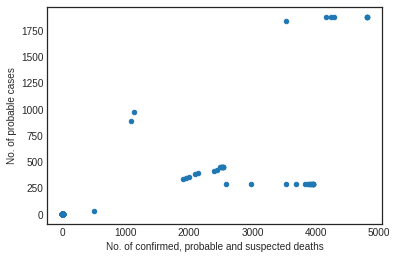

In [0]:
#scaner plots #figure.savefig('.../.jpeg')
#df_sample['ventas'] = dropna()
df_sample['No. of confirmed, probable and suspected deaths'] = df_sample['No. of confirmed, probable and suspected deaths'].astype('int64')

df_sample.plot(kind='scatter',x='No. of confirmed, probable and suspected deaths',y='No. of probable cases')

Text(0.5, 1.0, 'Frequency of Country')

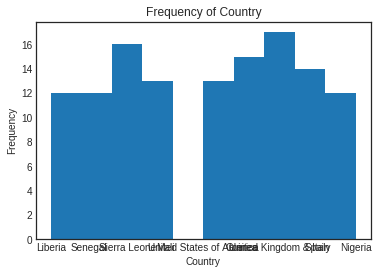

In [0]:
plt.hist(df_sample['Country'])
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.title('Frequency of Country')

Text(0.5, 1.0, 'Frequency of No. of confirmed, probable and suspected deaths')

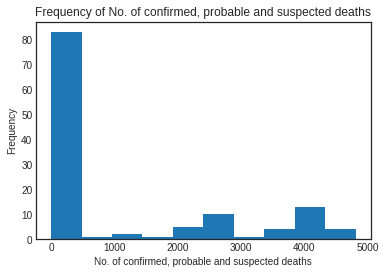

In [0]:
plt.hist(df_sample['No. of confirmed, probable and suspected deaths'])
plt.xlabel('No. of confirmed, probable and suspected deaths')
plt.ylabel('Frequency')
plt.title('Frequency of No. of confirmed, probable and suspected deaths')

Text(0.5, 1.0, 'Box Plot of No. of confirmed, probable and suspected deaths count')

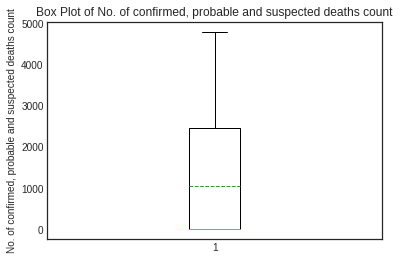

In [0]:
#plt.boxplot(df_sample['No. of confirmed, probable and suspected deaths'])
plt.boxplot(df_sample['No. of confirmed, probable and suspected deaths'], showmeans=True, meanline=True)
plt.ylabel('No. of confirmed, probable and suspected deaths count')
plt.title('Box Plot of No. of confirmed, probable and suspected deaths count')